In [1]:
import torch
import requests
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from transformers import AutoImageProcessor, DPTForDepthEstimation

In [ ]:
image = Image.open("/content/depth_before_processing.jpg")

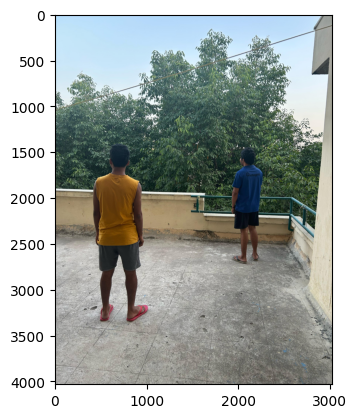

In [ ]:
plt.imshow(image)

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

preprocessor_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

# interpolate to original size
post_processed_output = image_processor.post_process_depth_estimation(
    outputs,
    target_sizes=[(image.height, image.width)],
)

# visualize the prediction
predicted_depth = post_processed_output[0]["predicted_depth"]
depth = predicted_depth * 255 / predicted_depth.max()
depth = depth.detach().cpu().numpy()
depth = Image.fromarray(depth.astype("uint8"))

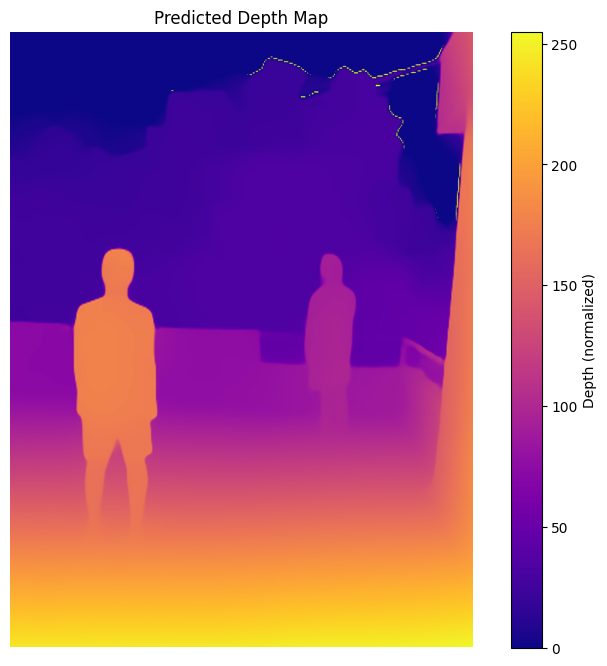

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(depth, cmap='plasma')  # Use a nice colormap like 'plasma' or 'inferno'
plt.colorbar(label='Depth (normalized)')
plt.axis('off')
plt.title('Predicted Depth Map')
plt.show()